In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import alexnet

from lib.datasets import datasets
from lib.utils import train, alex_classifier, pac_label_to_string, save_model, load_model, list_models, compute_error_rate

cuda = torch.cuda.is_available()

# PACS

In [2]:
ds = datasets()
ds.create_dataset('pacs', pacs='art_painting', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

epoch = 50
log_every = 10

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.36 | err rate 48.00%
Minibatch     20  | loss  0.99 | err rate 38.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 55.86% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.63 | err rate 23.00%
Minibatch     40  | loss  0.70 | err rate 26.00%
Minibatch     50  | loss  0.59 | err rate 19.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 48.88% | doing  50 epochs
----------------------------------------------------------
Minibatch     60  | loss  0.57 | err rate 19.00%
Minibatch     70  | loss  0.57 | err rate 21.00%
Minibatch     80  | loss  0.38 | err rate 15.00%
---------------------------------------------------------

Minibatch    730  | loss  0.13 | err rate  5.00%
Minibatch    740  | loss  0.12 | err rate  3.00%
Minibatch    750  | loss  0.21 | err rate  8.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 45.51% | doing  50 epochs
----------------------------------------------------------
Minibatch    760  | loss  0.14 | err rate  5.00%
Minibatch    770  | loss  0.20 | err rate  7.00%
Minibatch    780  | loss  0.19 | err rate  8.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 47.17% | doing  50 epochs
----------------------------------------------------------
Minibatch    790  | loss  0.15 | err rate  5.00%
Minibatch    800  | loss  0.18 | err rate  7.00%
Minibatch    810  | loss  0.19 | err rate  6.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 47.85% | doing  50 epochs
----------------------------------------------------------
Minibatch    820  | loss  0.

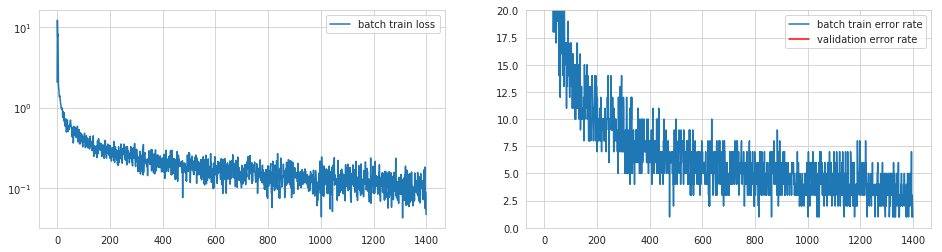

In [3]:
net = alexnet(pretrained=True)

# pick what to train

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_art_painting_full')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.58 | err rate 64.00%
Minibatch     20  | loss  0.98 | err rate 39.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 45.22% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.82 | err rate 32.00%
Minibatch     40  | loss  0.57 | err rate 19.00%
Minibatch     50  | loss  0.64 | err rate 23.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 44.37% | doing  50 epochs
----------------------------------------------------------
Minibatch     60  | loss  0.59 | err rate 21.00%
Minibatch     70  | loss  0.59 | err rate 23.00%
Minibatch     80  | loss  0.59 | err rate 20.00%
---------------------------------------------------------

Minibatch    710  | loss  0.22 | err rate  7.00%
Minibatch    720  | loss  0.17 | err rate  6.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 45.73% | doing  50 epochs
----------------------------------------------------------
Minibatch    730  | loss  0.12 | err rate  3.00%
Minibatch    740  | loss  0.20 | err rate  7.00%
Minibatch    750  | loss  0.15 | err rate  4.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 45.69% | doing  50 epochs
----------------------------------------------------------
Minibatch    760  | loss  0.18 | err rate  7.00%
Minibatch    770  | loss  0.14 | err rate  5.00%
Minibatch    780  | loss  0.20 | err rate  6.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 45.26% | doing  50 epochs
----------------------------------------------------------
Minibatch    790  | loss  0.18 | err rate  7.00%
Minibatch    800  | loss  0.

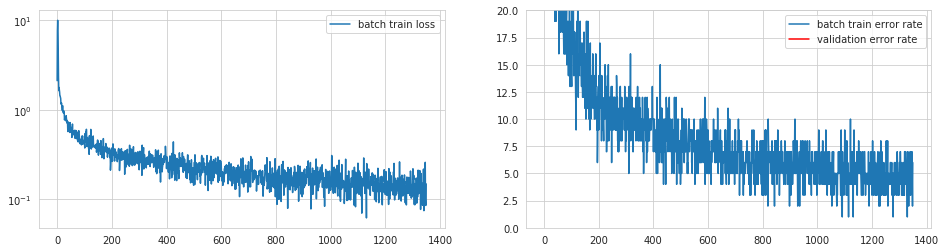

In [4]:
ds.create_dataset('pacs', pacs='cartoon', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_cartoon_full')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.64 | err rate 65.00%
Minibatch     20  | loss  1.19 | err rate 48.00%
Minibatch     30  | loss  1.20 | err rate 50.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 38.50% | doing  50 epochs
----------------------------------------------------------
Minibatch     40  | loss  0.79 | err rate 32.00%
Minibatch     50  | loss  0.77 | err rate 29.00%
Minibatch     60  | loss  0.61 | err rate 16.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 28.14% | doing  50 epochs
----------------------------------------------------------
Minibatch     70  | loss  0.61 | err rate 22.00%
Minibatch     80  | loss  0.59 | err rate 19.00%
Minibatch     90  | loss  0.90 | err rate 31.00%
--------

Minibatch    760  | loss  0.23 | err rate  8.00%
Minibatch    770  | loss  0.31 | err rate 11.00%
Minibatch    780  | loss  0.08 | err rate  1.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 24.01% | doing  50 epochs
----------------------------------------------------------
Minibatch    790  | loss  0.19 | err rate  5.00%
Minibatch    800  | loss  0.20 | err rate  7.00%
Minibatch    810  | loss  0.24 | err rate 11.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 22.04% | doing  50 epochs
----------------------------------------------------------
Minibatch    820  | loss  0.18 | err rate  6.00%
Minibatch    830  | loss  0.23 | err rate  7.00%
Minibatch    840  | loss  0.15 | err rate  5.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 23.17% | doing  50 epochs
----------------------------------------------------------
Minibatch    850  | loss  0.

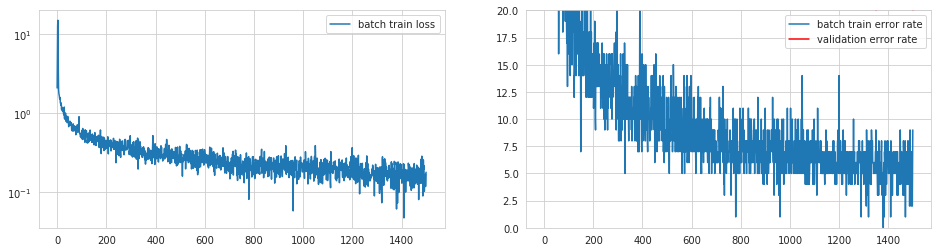

In [5]:
ds.create_dataset('pacs', pacs='photo', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_photo_full')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.31 | err rate 49.00%
Minibatch     20  | loss  0.89 | err rate 32.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 51.13% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.70 | err rate 24.00%
Minibatch     40  | loss  0.60 | err rate 22.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 42.91% | doing  50 epochs
----------------------------------------------------------
Minibatch     50  | loss  0.59 | err rate 19.00%
Minibatch     60  | loss  0.43 | err rate 14.00%
----------------------------------------------------------
After epoch  3 | valid err rate: 45.91% | doing  50 epochs
-------------------------------------

----------------------------------------------------------
After epoch 29 | valid err rate: 44.11% | doing  50 epochs
----------------------------------------------------------
Minibatch    640  | loss  0.07 | err rate  1.00%
Minibatch    650  | loss  0.14 | err rate  3.00%
Minibatch    660  | loss  0.11 | err rate  5.00%
----------------------------------------------------------
After epoch 30 | valid err rate: 43.90% | doing  50 epochs
----------------------------------------------------------
Minibatch    670  | loss  0.09 | err rate  3.00%
Minibatch    680  | loss  0.09 | err rate  2.00%
----------------------------------------------------------
After epoch 31 | valid err rate: 46.58% | doing  50 epochs
----------------------------------------------------------
Minibatch    690  | loss  0.15 | err rate  5.00%
Minibatch    700  | loss  0.07 | err rate  2.00%
----------------------------------------------------------
After epoch 32 | valid err rate: 42.33% | doing  50 epochs
--------

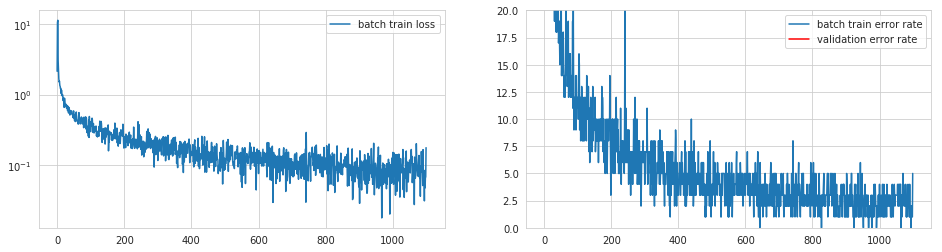

In [6]:
ds.create_dataset('pacs', pacs='sketch', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_sketch_full')

# TESTING PACS FROM SAVED MODELS

In [7]:
e_sum = 0

net = alexnet(pretrained=False)
net.classifier = alex_classifier(8)

for name in ['art_painting', 'cartoon', 'photo', 'sketch']:
    load_model(net, 'pacs_' + name + '_full')
    if cuda:
        net.cuda()
    
    ds.create_dataset('pacs', pacs=name)
    batch_loader = ds.batch_loader(256)
    
    res = compute_error_rate(net, batch_loader['test'], cuda)
    res = 100 - res
    print('PACS ', name, ' domain accuracy: ', res , "")
    e_sum += res

print('average accuracy for all: ', e_sum / 4.0)

PACS  art_painting  domain accuracy:  57.12890625 
PACS  cartoon  domain accuracy:  59.08703071672355 
PACS  photo  domain accuracy:  80.0 
PACS  sketch  domain accuracy:  60.62611351488928 
average accuracy for all:  64.21051262040321
